<a href="https://colab.research.google.com/github/LavanyaPanja/Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 144 µs (started: 2021-02-18 03:46:27 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 2.84 s (started: 2021-02-18 03:46:35 +00:00)


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/2e/b0/b1/2eb0b15844684b2f18876b211b59ee02.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.prettydesigns.com/wp-content/uploads/2014/09/Peony-Tattoo.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://cooldigitalphotography.com/wp-content/uploads/2013/11/Sunflower10.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cdn-img.instyle.com/sites/default/files/styles/684xflex/public/1504809763/090717-sunflowers-at-weddings-2.jpg?itok=z4ANmOrG
[%] File Downloaded !

[%] Downloading Image #5 from https://pic.cakesdecor.com/m/b5fhjl4robl3bpl3jmno.jpg
[Error]Invalid image, not saving https://pic.cakesdecor.com/m/b5fhjl4robl3bpl3jmno.jpg

[!] Issue getting: https://pic.cakesdecor.com/m/b5fhjl4robl3bpl3jmno.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #5 from https://www.wallpapers13.com/wp-content/uploads/2015/12/Aw

In [ ]:
from bing_image_downloader import downloader
downloader.download("rugby ball leather",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn.notonthehighstreet.com/system/product_images/images/000/393/351/original_CF016852.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://c1.staticflickr.com/3/2319/5810298255_1e031e64e5_b.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.gq-magazine.co.uk/photos/5d1397242881cc0ab70a8266/16:9/w_1920,c_limit/Rugby-ball-HP-GQ-01Oct15_b.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://images.antiquesatlas.com/dealer-stock-images/puckeringsantiques/Antique_Novelty_Travel_Inkwell_as584a1568z-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://cdn.shopify.com/s/files/1/0020/1025/1324/products/32p_black_1024x.png?v=1534865418
[%] File Downloaded !

[%] Downloading Image #6 from https://static.vecteezy.com/system/resources/previews/000/111/433/original/vector-leather-football-texture.jpg
[%] File Downloaded !

[%] Downloading Image #7 

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
 
target=[]
images=[]
flat_data=[]
 
DATADIR='/content/images'
CATEGORIES=['pretty sunflower','rugby ball leather']
for categories in CATEGORIES:
    class_num=CATEGORIES.index(categories) 
    path=os.path.join(DATADIR,categories)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized) 
        target.append(class_num)
 
flat_data=np.array(flat_data) 
target=np.array(target)
images=np.array(images)

time: 11.9 s (started: 2021-02-18 04:30:56 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 4.25 ms (started: 2021-02-18 04:31:43 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 3.48 ms (started: 2021-02-18 04:32:35 +00:00)


<BarContainer object of 2 artists>

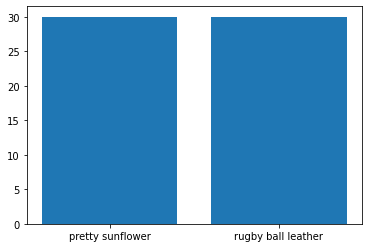

time: 155 ms (started: 2021-02-18 04:35:46 +00:00)


In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 243 ms (started: 2021-02-18 04:46:00 +00:00)


In [ ]:
 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
             {'C':[1, 10,100,1000], 'kernel':['linear']}, 
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}, 
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 20.3 s (started: 2021-02-18 04:54:51 +00:00)


In [ ]:
y_pred=clf.predict(x_test) 
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

time: 30.8 ms (started: 2021-02-18 04:57:58 +00:00)


In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 3.9 ms (started: 2021-02-18 04:57:41 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 1.43 ms (started: 2021-02-18 05:00:14 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.8888888888888888

time: 5.02 ms (started: 2021-02-18 05:02:24 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[9, 0],
       [2, 7]])

time: 6.89 ms (started: 2021-02-18 05:02:28 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 18.8 ms (started: 2021-02-18 05:06:30 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 16.5 ms (started: 2021-02-18 05:08:31 +00:00)


In [85]:
flat_data=[]
url=input('Enter your URL')
img=imread(url) 
img_resized=resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape) 
plt.imshow(img_resized)
y_out=model.predict(flat_data) 
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

Enter your URLhttps://www.bing.com/images/search?view=detailV2&ccid=4jSSjHtE&id=3BFFEE151132D6D6AE01CFB9004892A49AF5705A&thid=OIP.4jSSjHtE_5xc6e5FXU7FOwHaIM&mediaurl=https%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2fthumb%2f4%2f40%2fSunflower_sky_backdrop.jpg%2f1200px-Sunflower_sky_backdrop.jpg&exph=1329&expw=1200&q=sunflower&simid=607995296225231139&ck=068858F947D7FCD33365987B11DB1766&selectedIndex=2&FORM=IRPRST


ValueError: ignored

time: 53.5 s (started: 2021-02-18 06:24:32 +00:00)
